In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [90]:
df = pd.read_csv('clean&fe_shopee_data.csv',index_col=0)

## EDA 

In [91]:
df.drop(['info','rating','product_reviews','shop_info','class_name'],axis=1,inplace=True)

In [92]:
df.head()

,price,quantity_like,Made_in,Send_from,rating_star,evaluate,quantity_sold,rating5star,rating4star,rating3star,rating2star,rating1star,quantity_comment,quantity_pic_video,Type_store,shop_response_rate,shop_evaluates,shop_follows,shop_join_time,shop_product_number,Type_product,Type_items
0,9450.0,30200.0,China,Hà Nội,4.9,118200,1600000,111300,3900,1500,535,840,64200,56300,Favorite_store,96,787400,575900,34,875,Thời Trang Nữ,Đồ lót
1,9920.0,9800.0,VietNam,Hà Nội,4.9,17100,237200,16100,588,223,81,161,9300,8800,Standard_store,68,87000,55000,72,242,Thời Trang Nữ,Vải len
2,7700.0,19000.0,China,Hà Nội,4.9,41200,660700,39400,1400,325,60,78,22200,19900,Favorite_store,99,254300,249500,23,229,Thời Trang Nữ,Tất vớ
3,7700.0,4500.0,China,HCM,4.9,4600,81300,4300,169,43,7,6,2500,2200,Favorite_store,100,10200,11700,8,84,Thời Trang Nữ,Tất vớ
4,9950.0,8900.0,China,Nơi khác,4.9,18100,258000,17500,455,137,48,42,11300,10600,Favorite_store,97,83900,69600,60,180,Thời Trang Nữ,Vải len


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 1362
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1262 non-null   float64
 1   quantity_like        1262 non-null   float64
 2   Made_in              1262 non-null   object 
 3   Send_from            1262 non-null   object 
 4   rating_star          1262 non-null   float64
 5   evaluate             1262 non-null   int64  
 6   quantity_sold        1262 non-null   int64  
 7   rating5star          1262 non-null   int64  
 8   rating4star          1262 non-null   int64  
 9   rating3star          1262 non-null   int64  
 10  rating2star          1262 non-null   int64  
 11  rating1star          1262 non-null   int64  
 12  quantity_comment     1262 non-null   int64  
 13  quantity_pic_video   1262 non-null   int64  
 14  Type_store           1262 non-null   object 
 15  shop_response_rate   1262 non-null   i

import pandas_profiling as pp
pp.ProfileReport(df)

In [94]:
df.columns

Index(['price', 'quantity_like', 'Made_in', 'Send_from', 'rating_star',
       'evaluate', 'quantity_sold', 'rating5star', 'rating4star',
       'rating3star', 'rating2star', 'rating1star', 'quantity_comment',
       'quantity_pic_video', 'Type_store', 'shop_response_rate',
       'shop_evaluates', 'shop_follows', 'shop_join_time',
       'shop_product_number', 'Type_product', 'Type_items'],
      dtype='object')

In [95]:
first_col = df.pop('quantity_sold')
df.insert(0, 'quantity_sold', first_col)

In [96]:
num_col = ['price', 'quantity_like','rating_star','evaluate','rating5star', 'rating4star',
       'rating3star', 'rating2star', 'rating1star', 'quantity_comment',
       'quantity_pic_video','shop_response_rate',
       'shop_evaluates', 'shop_follows', 'shop_join_time',
       'shop_product_number']
cat_col = ['Made_in', 'Send_from','Type_store','Type_product', 'Type_items']

for i in cat_col:
    df[i]=df[i].astype('category')

### Visualization đơn biến


In [97]:
def plot_distribution1 (data, col_name, bins=5,ax=None):
    plot_data = data[col]
    ax = sns.histplot(x=plot_data,bins=bins,ax=ax,kde=True)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)
def plot_valuecount1 (data, col_name,ax = None):
    plot_data = data[col]
    ax = sns.countplot(x=plot_data,ax=ax)
    title = 'Value count of {}'.format(col_name)
    ax.set_title(title)
    plt.xticks(rotation=50,fontsize=10)

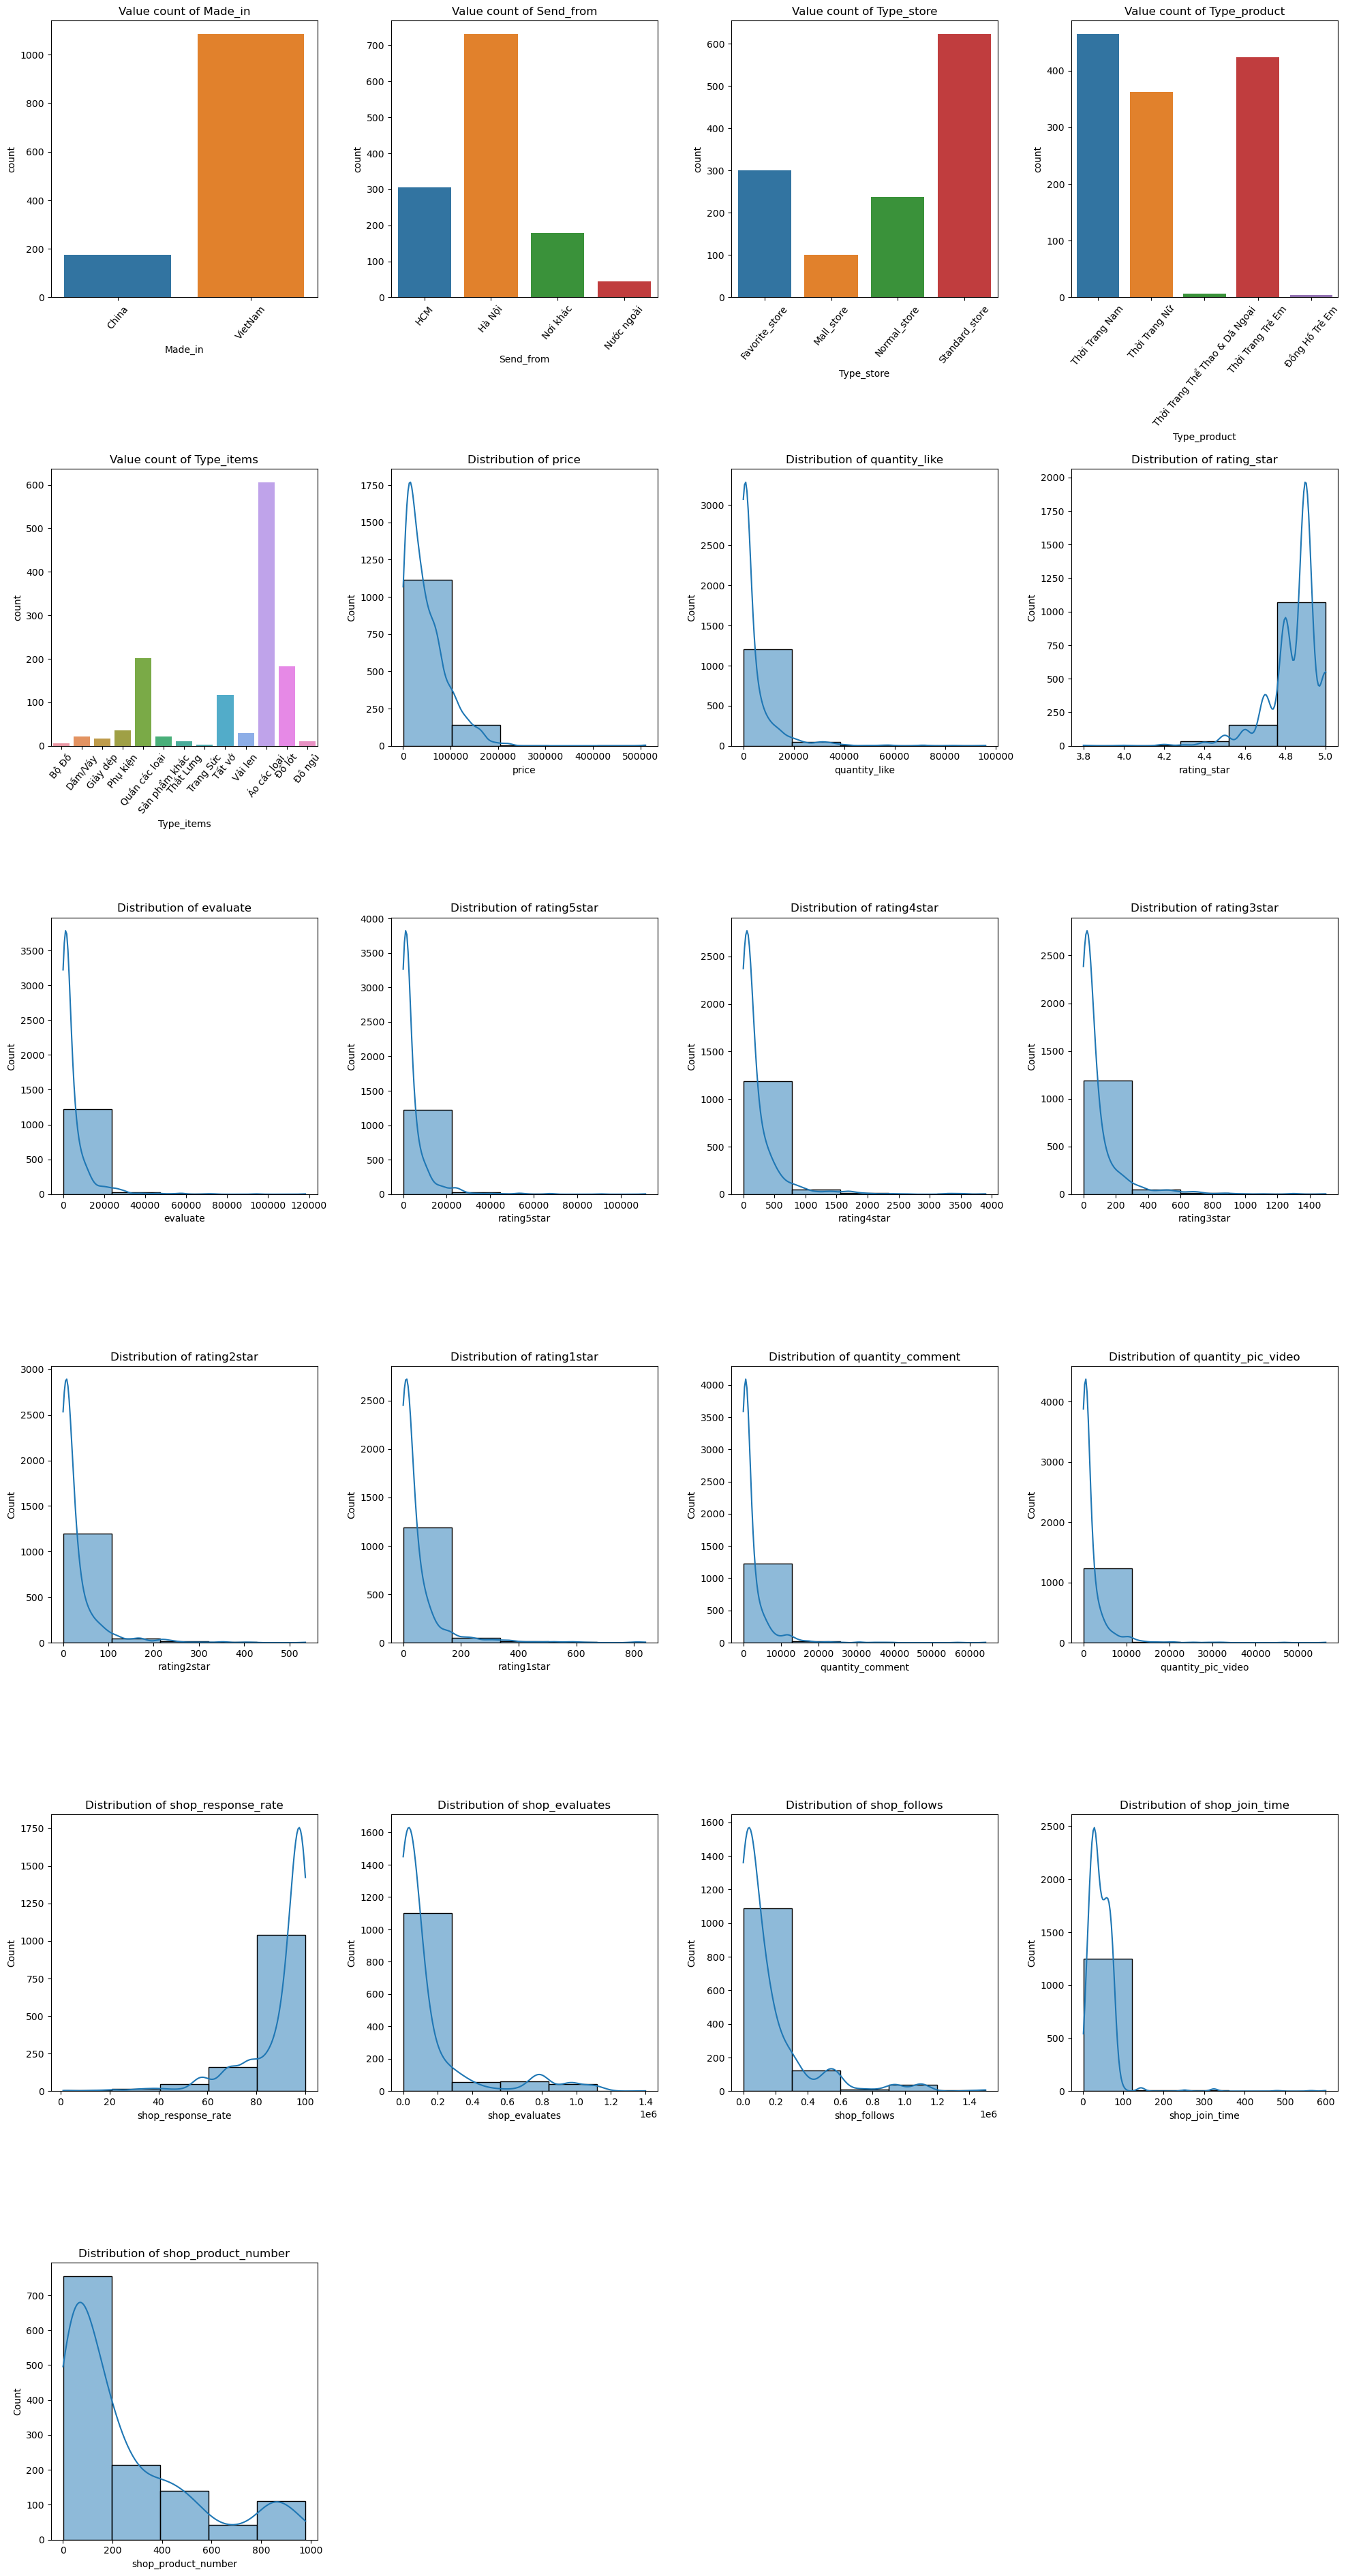

In [98]:
fig = plt.figure(figsize=(20,38))

for i,col in enumerate (cat_col+num_col):
    ax = fig.add_subplot(6, 4, i+1)
    if df[col].dtypes == 'category':
        plot_valuecount1(df,col,ax=ax)
    else :
        plot_distribution1(df,col,bins=5,ax=ax)   
plt.tight_layout(pad=1.4);

### Visualization đơn biến với variable y (quantity_sold)

In [99]:
def plot_distribution2 (data, col_name,ax=None):
    y = data['quantity_sold']
    plot_data = data[col]
    ax = sns.scatterplot(x=plot_data,ax=ax,y=y)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)
def plot_valuecount2 (data, col_name,ax = None):
    y=data['quantity_sold']
    plot_data = data[col]
    ax = sns.barplot(x=plot_data,y=y,ax=ax)
    title = 'Value count of {}'.format(col_name)
    ax.set_title(title)
    plt.xticks(rotation=50,fontsize=10)

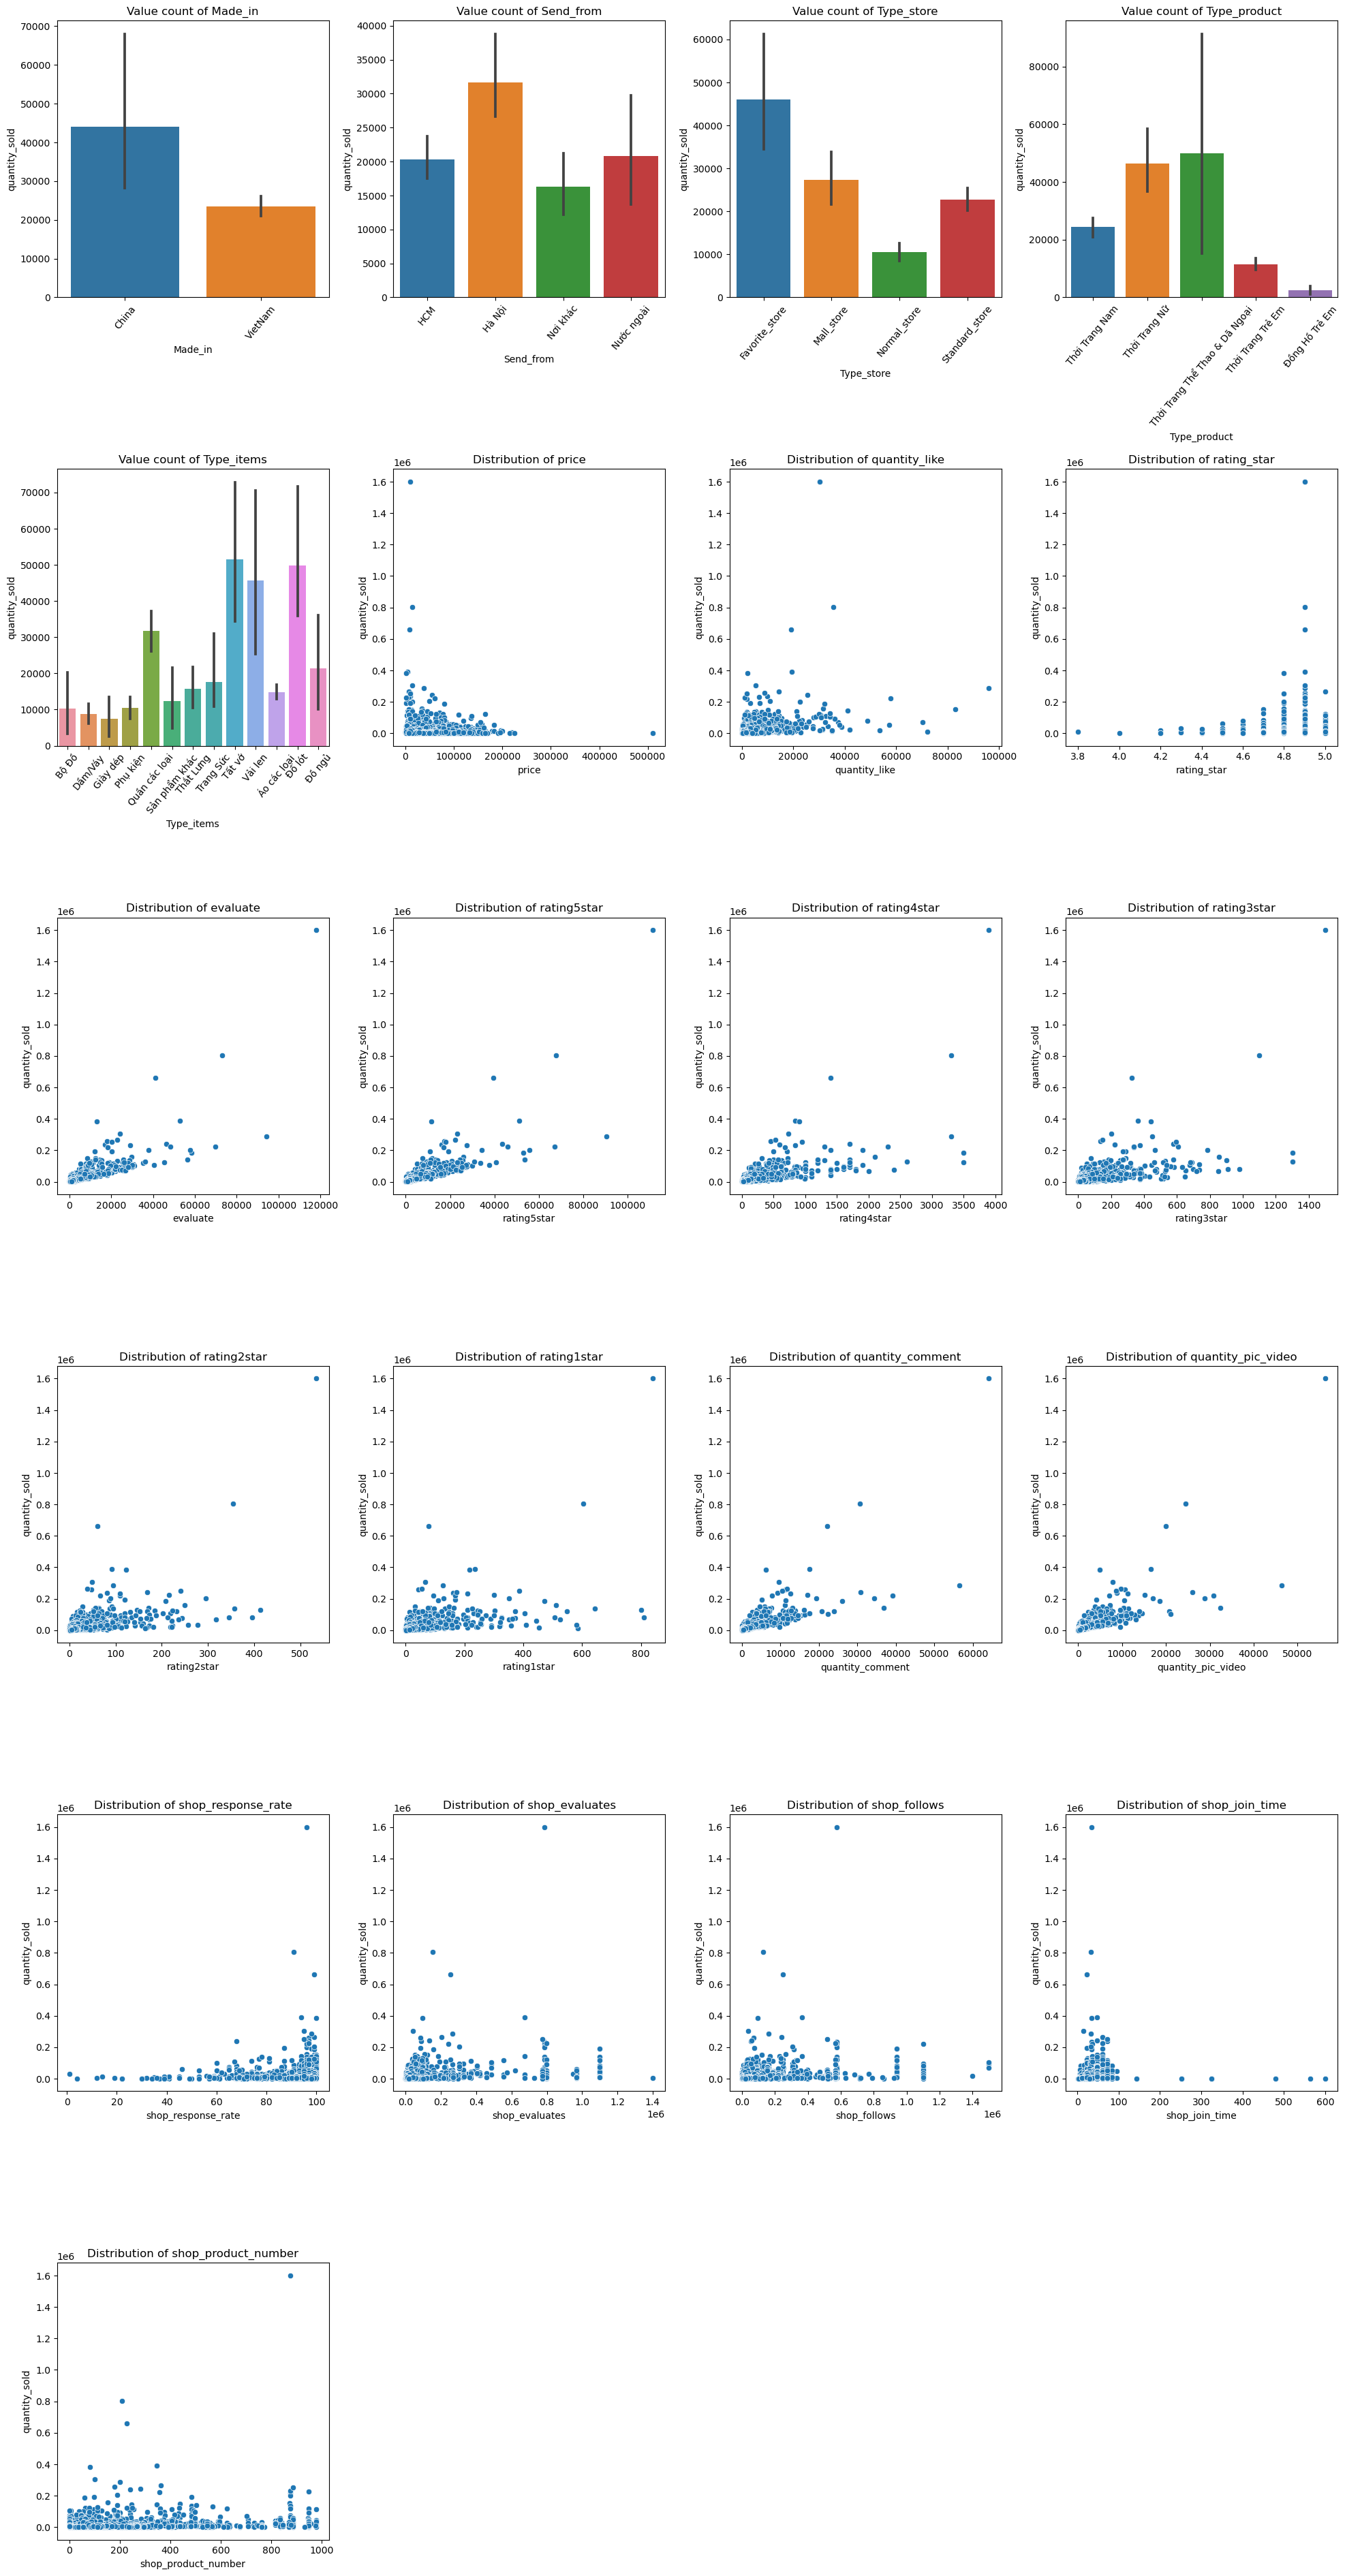

In [100]:
fig = plt.figure(figsize=(20,38))

for i,col in enumerate (cat_col+num_col):
    ax = fig.add_subplot(6, 4, i+1)
    if df[col].dtypes == 'category':
        plot_valuecount2(df,col,ax=ax)
    else :
        plot_distribution2(df,col,ax=ax)   
plt.tight_layout(pad=1.4);

### Tỷ lệ tương quan giữa các biến 

<AxesSubplot: >

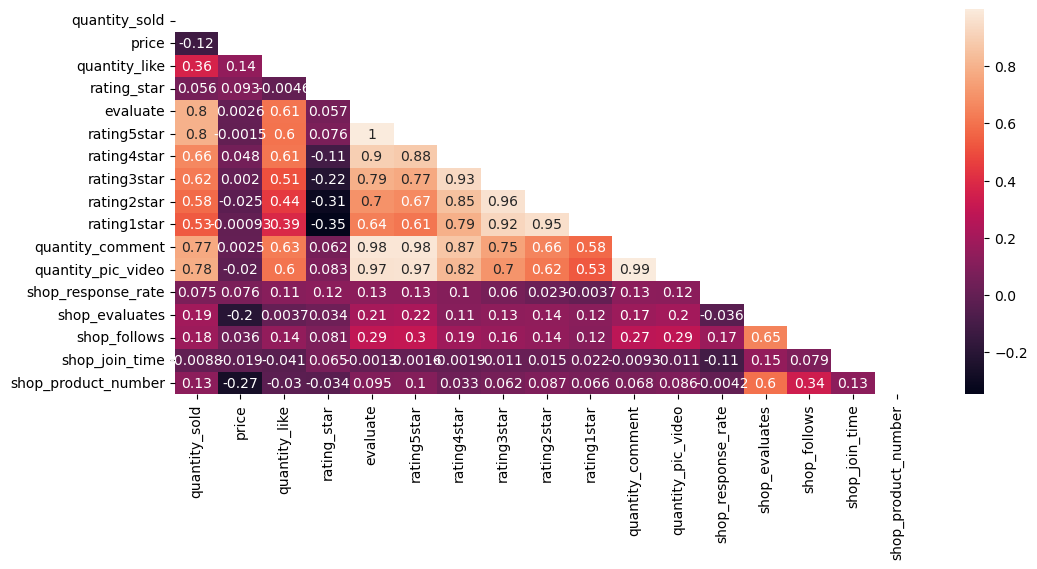

In [101]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(12, 5))
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, annot=True, mask=mask)

### Ta thấy biến evaluate có tỷ lệ tương quan quá lớn với các biến rating(5-1)star
### =>> ta loại bỏ biến này khỏi DF

In [102]:
df.drop(['evaluate'],axis=1,inplace=True)

### Xử lý Outlier

In [124]:
def outlier_func(df,x):
    Q1=df[x].quantile(0.25)
    Q2=df[x].quantile(0.75)
    lower_limit = Q1-1.5*IQR
    upper_limit = Q2+1.5*IQR
    return df[(df[x]>lower_limit)&(df[x]<upper_limit)]

In [134]:
df_1=outlier_func(df,'rating5star')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 3 to 1362
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   quantity_sold        1137 non-null   int64   
 1   price                1137 non-null   float64 
 2   quantity_like        1137 non-null   float64 
 3   Made_in              1137 non-null   category
 4   Send_from            1137 non-null   category
 5   rating_star          1137 non-null   float64 
 6   rating5star          1137 non-null   int64   
 7   rating4star          1137 non-null   int64   
 8   rating3star          1137 non-null   int64   
 9   rating2star          1137 non-null   int64   
 10  rating1star          1137 non-null   int64   
 11  quantity_comment     1137 non-null   int64   
 12  quantity_pic_video   1137 non-null   int64   
 13  Type_store           1137 non-null   category
 14  shop_response_rate   1137 non-null   int64   
 15  shop_evaluates       

In [138]:
df=outlier_func(df_1,'quantity_comment')

In [ ]:
num_col.remove('evaluate')

In [151]:
features = num_col+cat_col
X = df[features]
y = df['quantity_sold']

## MODEL

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_selector

In [153]:
num_tr = Pipeline(steps=[('scaler',StandardScaler())])
cat_tr = Pipeline(steps=[('enc',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num',num_tr,num_col),
    ('cat',cat_tr,cat_col)
])

In [154]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['price', 'quantity_like', 'rating_star',
                                  'rating5star', 'rating4star', 'rating3star',
                                  'rating2star', 'rating1star',
                                  'quantity_comment', 'quantity_pic_video',
                                  'shop_response_rate', 'shop_evaluates',
                                  'shop_follows', 'shop_join_time',
                                  'shop_product_number']),
                                ('cat',
                                 Pipeline(steps=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Made_in', 'Send_from', 'Type_store',
                                  'Type_product', 'Type_items'])])

In [155]:
X = preprocessor.transform(X)

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5)
X_train.shape, X_val.shape,X_test.shape

((681, 43), (227, 43), (228, 43))

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [158]:
fs = RandomForestRegressor(n_estimators=122,max_depth=22)
fs.fit(X_train,y_train)

RandomForestRegressor(max_depth=22, n_estimators=122)

In [160]:
y_preds = fs.predict(X_val)
print(fs.score(X_val,y_val))
y_preds_test = fs.predict(X_test)
print(fs.score(X_test,y_test))

0.8127879870114575
0.7926167387290053


In [161]:
print(mean_absolute_error(y_val,y_preds),\
      mean_absolute_error(y_test,y_preds_test))

4488.97844298404 4314.984703048604


df_1 = pd.DataFrame({'y':y_val[30:50],'y_preds':y_preds[30:50]})
df_1

In [163]:
from catboost import CatBoostRegressor

In [176]:
catb = CatBoostRegressor(learning_rate=0.01,n_estimators=1200,max_depth=5,verbose=100,od_type='Iter',od_wait=20,subsample=0.7)

In [177]:
catb.fit(X_train,y_train,eval_set=(X_val,y_val),use_best_model=True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 18813.8548786	test: 17233.8861408	best: 17233.8861408 (0)	total: 2.67ms	remaining: 3.2s
100:	learn: 12140.8819606	test: 11218.8767592	best: 11218.8767592 (100)	total: 164ms	remaining: 1.79s
200:	learn: 9323.2111444	test: 9032.8388104	best: 9032.8388104 (200)	total: 328ms	remaining: 1.63s
300:	learn: 7990.3644539	test: 8200.8633642	best: 8200.8633642 (300)	total: 484ms	remaining: 1.44s
400:	learn: 7193.6139606	test: 7800.4558070	best: 7800.4558070 (400)	total: 624ms	remaining: 1.24s
500:	learn: 6679.2909209	test: 7595.2950841	best: 7595.2950841 (500)	total: 776ms	remaining: 1.08s
600:	learn: 6248.5934926	test: 7458.7118841	best: 7458.7118841 (600)	total: 934ms	remaining: 931ms
700:	learn: 5922.8411668	test: 7357.8098122	best: 7357.8098122 (700)	total: 1.1s	remaining: 783ms
800:	learn: 5607.5557326	test: 7290.2919600	best: 7289.2367688 (799)	total: 1.29s	remaining: 643ms
900:	learn: 5369.0891711	test: 7256.8534857	best: 7256.2398385 (899)	total: 1.48s	remaining: 492ms
1000:	lea

In [178]:
print(catb.score(X_val,y_val))
print(catb.score(X_test,y_test))

0.8272916423801255
0.8073978483803255


In [179]:
y_pred4 = catb.predict(X_val)
print(mean_absolute_error(y_val,y_pred4))
y_pred4_test = catb.predict(X_test)
print(mean_absolute_error(y_test,y_pred4_test))

4344.476523504749
4277.82778668969


In [183]:
df_5 = pd.DataFrame({'y':y_val[:],'y_preds':y_pred4[:]})
df_5.head()
df_6 = pd.DataFrame({'y':y_test[:],'y_preds':y_pred4_test[:]})
df_6.head()

,y,y_preds
539,30000,25968.024613
24,34200,30568.269642
45,10300,12798.979915
805,38100,40176.812926
1344,2300,1730.428815


In [184]:
df_6['error']=np.abs(df_6['y']-df_6['y_preds'])
df_6.sort_values('error',ascending=False).head()

,y,y_preds,error
73,97300,48270.004367,49029.995633
9,113900,66248.933885,47651.066115
5,100200,63960.328510,36239.671490
546,33800,56168.308982,22368.308982
38,82400,61375.825762,21024.174238


In [185]:
# features importance
feature_import = [t for t in zip(features,catb.get_feature_importance())]
feature_import_df = pd.DataFrame(feature_import, columns=['Feature','Varimp'])
feature_import_df = feature_import_df.sort_values('Varimp',ascending=False)
feature_import_df.head(5)

,Feature,Varimp
3,rating5star,25.553190
0,price,22.933990
9,quantity_pic_video,12.096856
8,quantity_comment,7.176064
4,rating4star,4.425455
